# 回転について

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation
import sympy as sym
from scipy.linalg import logm, expm
from scipy.spatial.transform import Rotation
%matplotlib nbagg

In [33]:
def arrow(ax, v, sp, c):
    # 空間座標基準で矢印をプロットする
    # v:ベクトル、sp:始点、c:色
    return ax.quiver(sp[0], sp[1], sp[2],
              v[0]+sp[0], v[1]+sp[1], v[2]+sp[2],
              length=np.linalg.norm(v),
              color=c, linewidth=1)

<IPython.core.display.Javascript object>


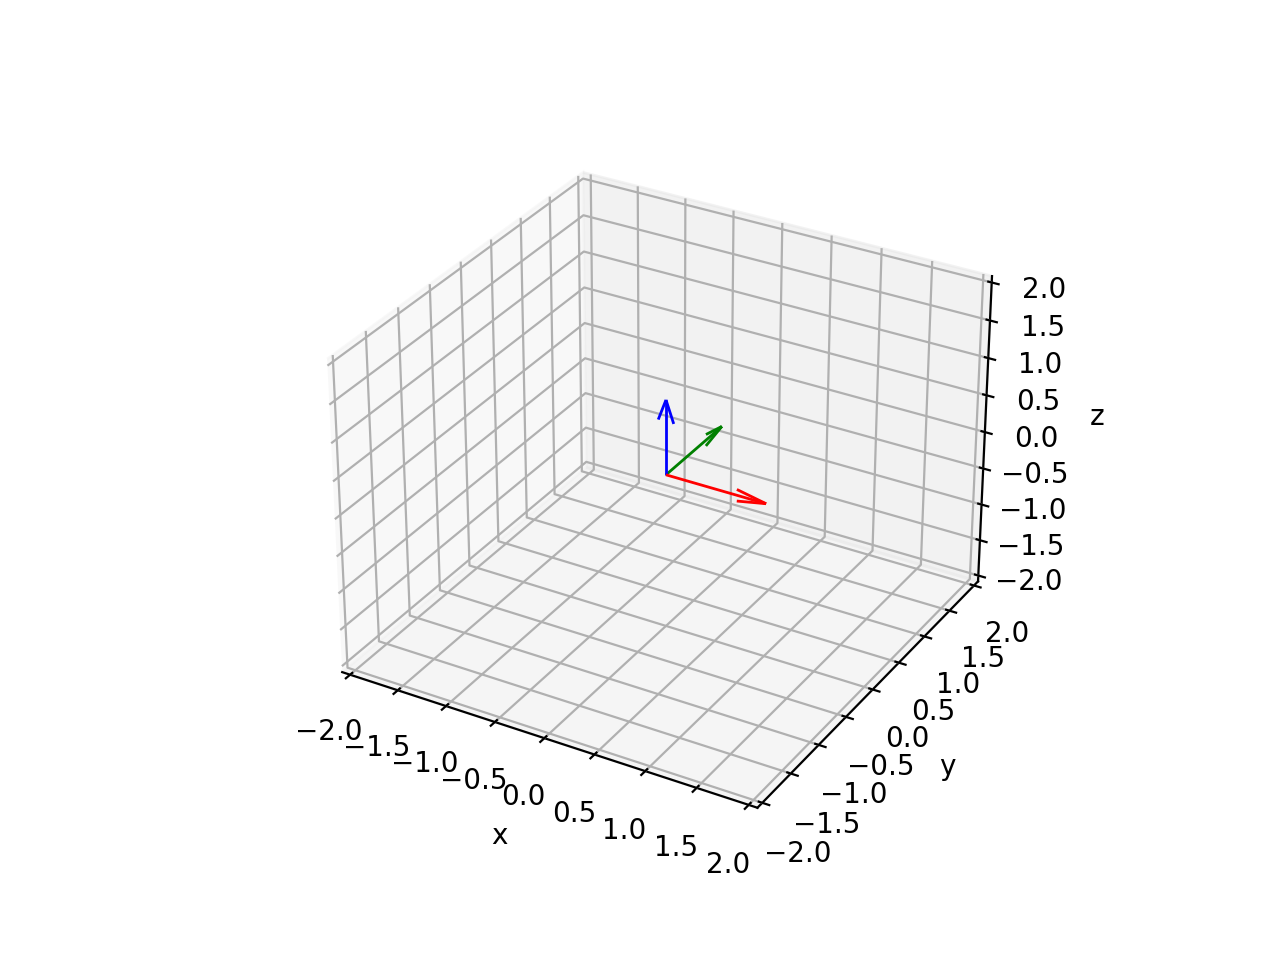

In [34]:
O = np.array([0, 0, 0])
e1_O = np.array([1, 0, 0])
e2_O = np.array([0, 1, 0])
e3_O = np.array([0, 0, 1])

# プロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arrow(ax, e1_O, O, "r") #x軸方向
arrow(ax, e2_O, O, "g") #y軸方向
arrow(ax, e3_O, O, "b") #z軸方向
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

### x軸周りに45度回転


<IPython.core.display.Javascript object>


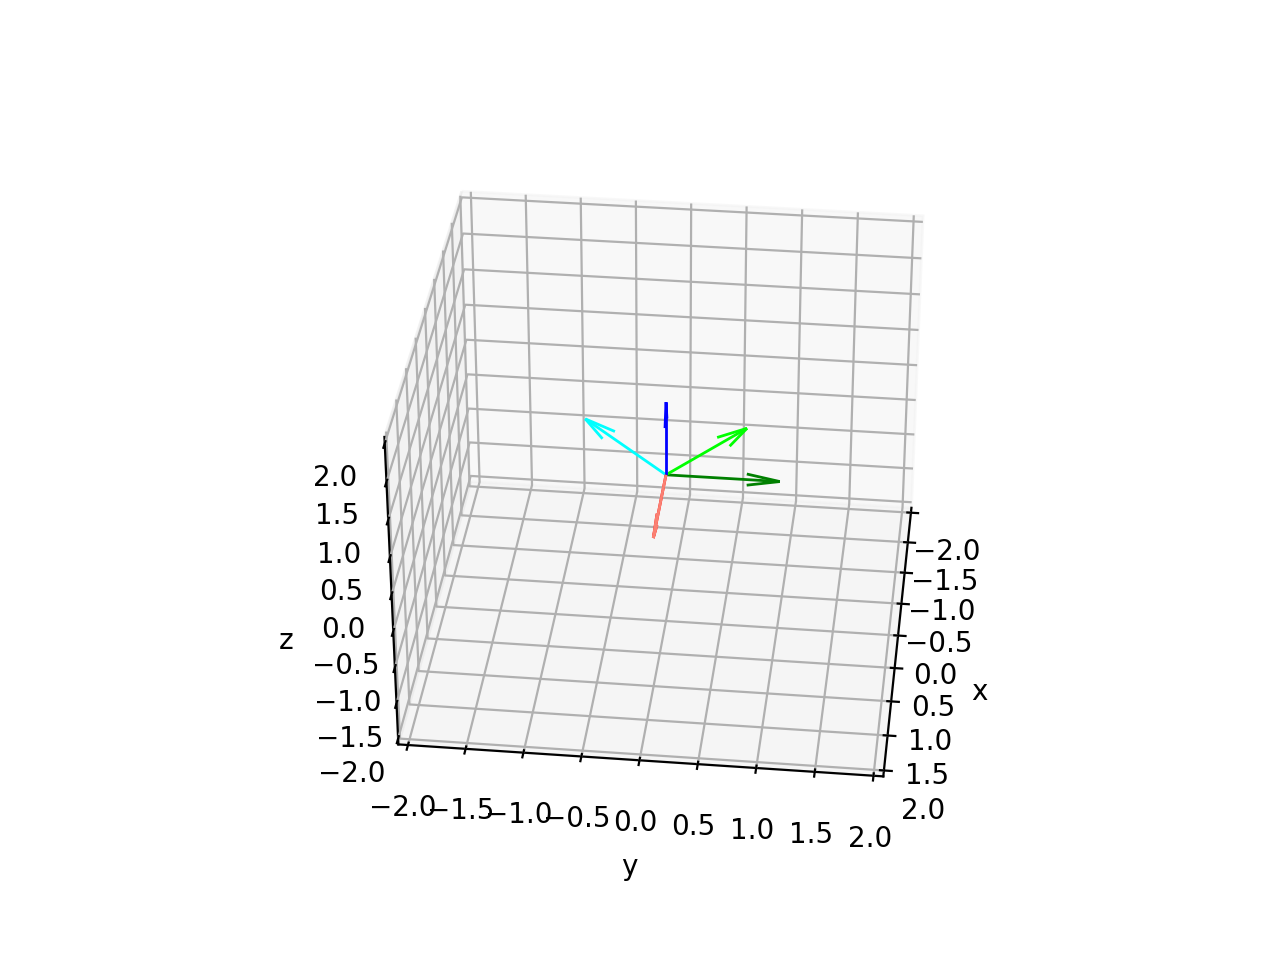

In [27]:
def rotX(deg):

    rad = np.deg2rad(deg)
    R = np.array([[1, 0, 0],
                   [0, np.cos(rad), -np.sin(rad)],
                   [0, np.sin(rad), np.cos(rad)]])
    return R



O = np.array([0, 0, 0])
e1_O = np.array([1, 0, 0])
e2_O = np.array([0, 1, 0])
e3_O = np.array([0, 0, 1])

#X軸周りに45[deg]回転
R_x = rotX(45)
e1_O_2 = R_x.dot(e1_O)
e2_O_2 = R_x.dot(e2_O)
e3_O_2 = R_x.dot(e3_O)


# プロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

arrow(ax, e1_O, O, "r") #x軸方向
arrow(ax, e2_O, O, "g") #y軸方向
arrow(ax, e3_O, O, "b") #z軸方向

arrow(ax, e1_O_2, O, "salmon") #x軸方向
arrow(ax, e2_O_2, O, "lime") #y軸方向
arrow(ax, e3_O_2, O, "aqua") #z軸方向

#設定
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [10]:
#ベクトルから歪対称行列を求める
def vec2skew(vec):
    return np.array([[0, -vec[2], vec[1]], 
                     [vec[2], 0, -vec[0]], 
                     [-vec[1], vec[0], 0]])
    

#歪対称行列からベクトルを求める
def skew2vec(skew_matrix):
    return np.array([skew_matrix[2][1], skew_matrix[0][2], skew_matrix[1][0]])

##  角速度ベクトルの積分と行列指数関数
回転運動の基礎式

In [61]:
#角速度ベクトル, 単位ベクトル * 角速度
w = np.array([1, 0, 0 ]) * np.deg2rad(10)

#skew_matrix
w_skew = vec2skew(w)
print(w)
print(w_skew)
print("scipyを使用して求める")
R = expm(w_skew)
R_log = logm(R)
print(R)
print(R_log)


s = np.linalg.norm(w)
w_e = w/s
w_e_skew = vec2skew(w_e)
R_2 = np.eye(3) + ( w_e_skew*np.sin(s) ) + ( (w_e_skew.dot(w_e_skew)) * (1 - np.cos(s)) )
print(w_e)
print(s)
print("通常の計算で求める")
print(R_2)
s_2 = np.arccos( ( np.trace(R_2) - 1.0 ) / 2.0 )
print(s_2)
w_e_2 = np.array([ (R_2[2][1] - R_2[1][2]), (R_2[0][2] - R_2[2][0]), (R_2[1][0] - R_2[0][1]) ]) / (2 * np.sin(s_2))
print(w_e_2)

[0.17453293 0.         0.        ]
[[ 0.         -0.          0.        ]
 [ 0.          0.         -0.17453293]
 [-0.          0.17453293  0.        ]]
scipyを使用して求める
[[ 1.          0.          0.        ]
 [ 0.          0.98480775 -0.17364818]
 [ 0.          0.17364818  0.98480775]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.67083654e-16 -1.74532925e-01]
 [ 0.00000000e+00  1.74532925e-01  7.05974745e-17]]
通常の計算で求める
[1. 0. 0.]
0.17453292519943295
[[ 1.          0.          0.        ]
 [ 0.          0.98480775 -0.17364818]
 [ 0.          0.17364818  0.98480775]]
0.17453292519943256
[1. 0. 0.]


[0.17453293 0.         0.        ]
[[ 0.         -0.          0.        ]
 [ 0.          0.         -0.17453293]
 [-0.          0.17453293  0.        ]]
[[ 1.          0.          0.        ]
 [ 0.          0.98480775 -0.17364818]
 [ 0.          0.17364818  0.98480775]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.49186219e-16 -1.74532925e-01]
 [ 0.00000000e+00  1.74532925e-01 -1.49186219e-16]]


<IPython.core.display.Javascript object>


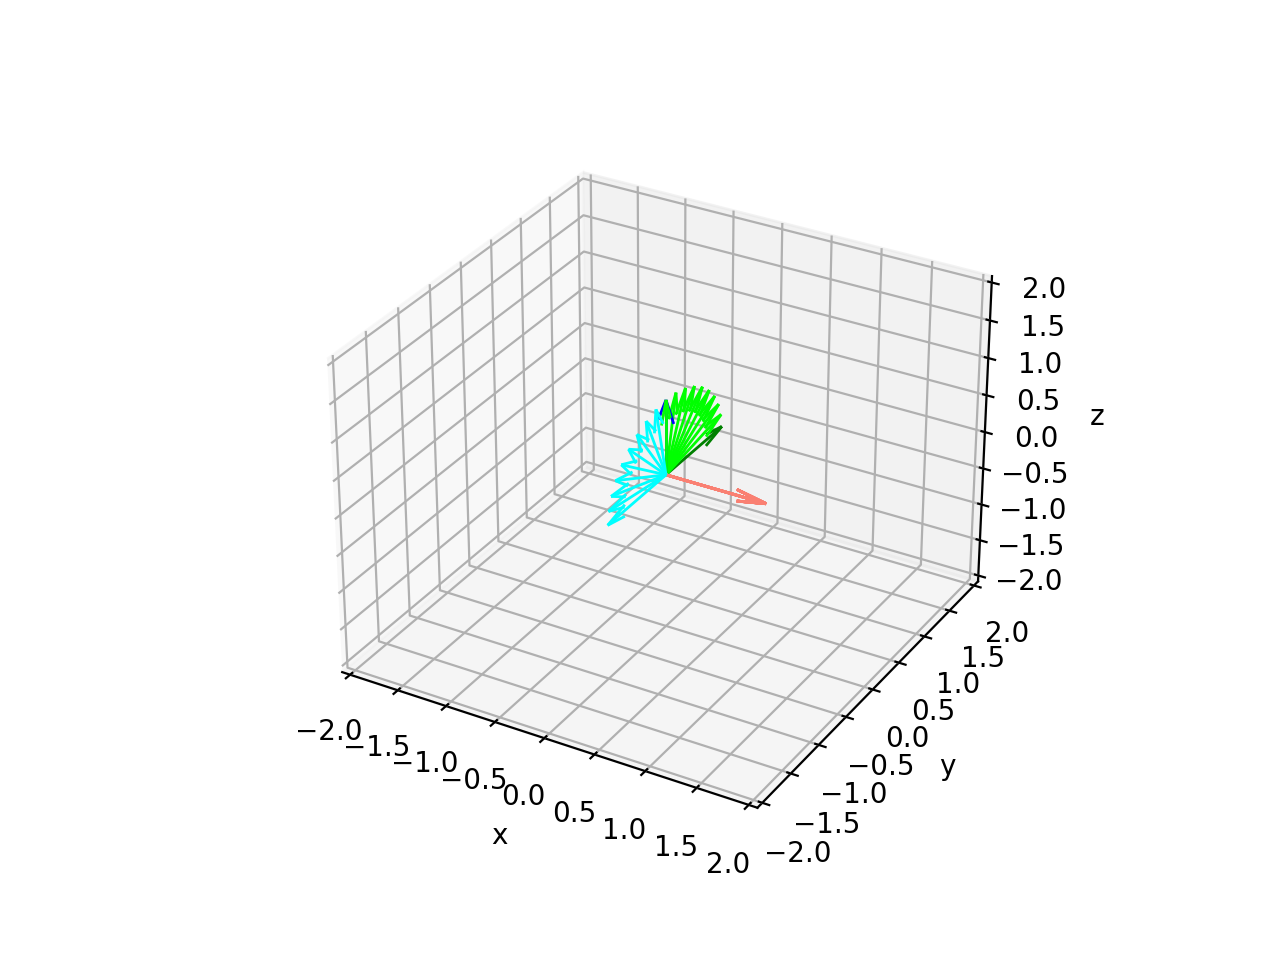

In [44]:
#角速度ベクトル, 単位ベクトル * 角速度
w = np.array([1, 0, 0 ]) * np.deg2rad(10)

#skew_matrix
w_skew = vec2skew(w)
R = sym.Matrix(w_skew).exp()
R = sym.matrix2numpy(R).astype(float)
R_log = logm(R)
print(w)
print(w_skew)
print(R)
print(R_log)

# プロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

O = np.array([0, 0, 0])

e_list = [[np.array([1, 0, 0])], [np.array([0, 1, 0])], [np.array([0, 0, 1])]]

num_time = 9
for i in range(num_time):
    R = sym.Matrix(w_skew*(i+1)).exp()
    R = sym.matrix2numpy(R).astype(float)
    e_list[0].append(R.dot(e_list[0][0]))
    e_list[1].append(R.dot(e_list[1][0]))
    e_list[2].append(R.dot(e_list[2][0]))

arrow(ax, e_list[0][0], O, "r") #x軸方向
arrow(ax, e_list[1][0], O, "g") #y軸方向
arrow(ax, e_list[2][0], O, "b") #z軸方向

for i in range(num_time):
    arrow(ax, e_list[0][i+1], O, "salmon") #x軸方向
    arrow(ax, e_list[1][i+1], O, "lime") #y軸方向
    arrow(ax, e_list[2][i+1], O, "aqua") #z軸方向

#設定
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

### 回転のアニメーション

<IPython.core.display.Javascript object>


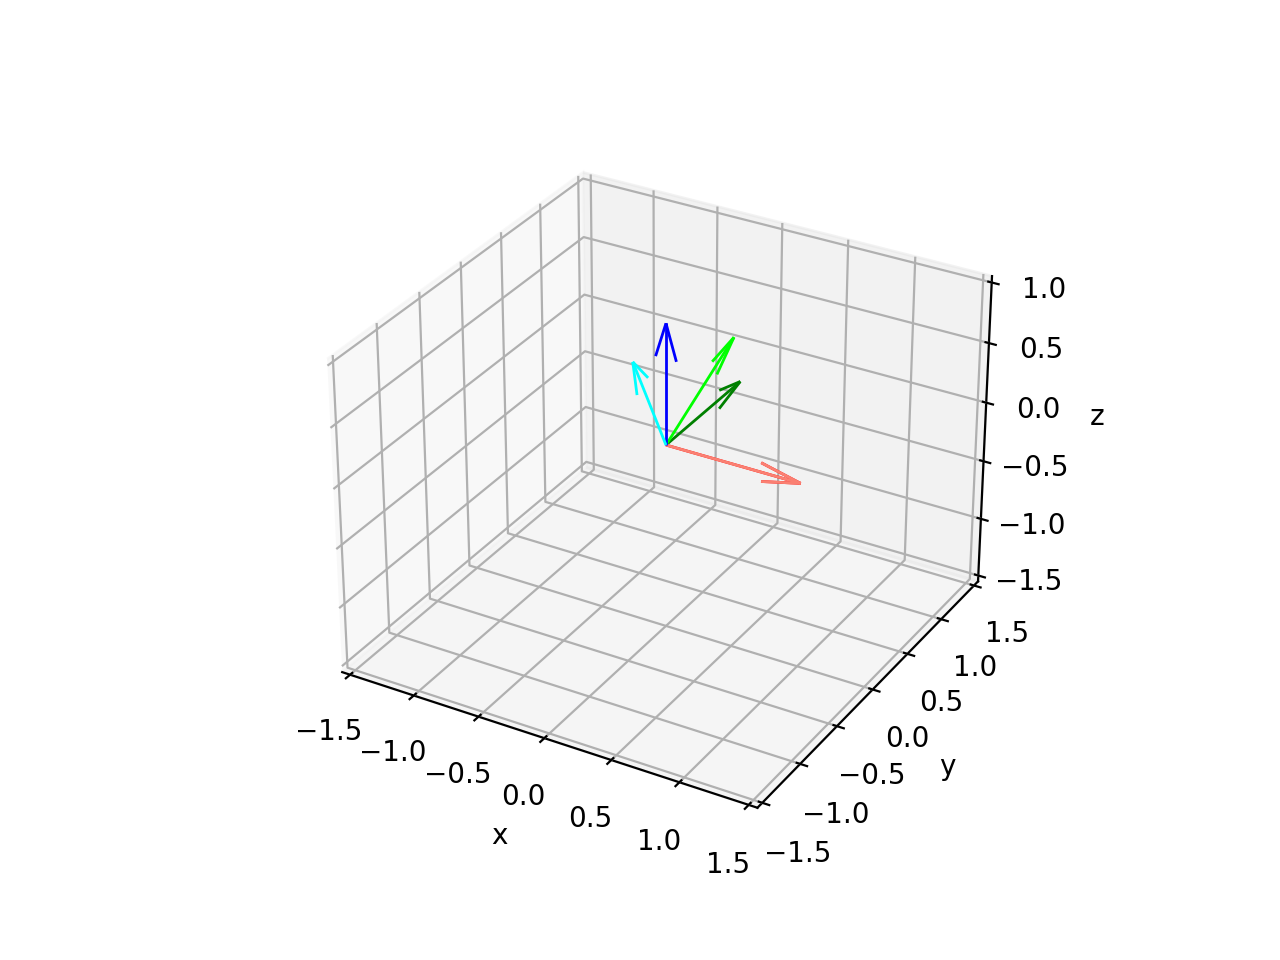

In [38]:
#角速度ベクトル, 単位ベクトル * 角速度
w = np.array([1, 0, 0 ]) * np.deg2rad(10)

#skew_matrix
w_skew = vec2skew(w)


O = np.array([0, 0, 0])
e1_O = np.array([1, 0, 0])
e2_O = np.array([0, 1, 0])
e3_O = np.array([0, 0, 1])


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1,5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


elems = []

arrow(ax, e1_O, O, "r") #x軸方向
arrow(ax, e2_O, O, "g") #y軸方向
arrow(ax, e3_O, O, "b") #z軸方向


def update(f):
    while (len(elems) > 0):
        elems.pop().remove()
    R = sym.Matrix(w_skew*(f)).exp()
    R = sym.matrix2numpy(R).astype(float)
    elems.append(arrow(ax, R.dot(e1_O), O, "salmon"))
    elems.append(arrow(ax, R.dot(e2_O), O, "lime"))
    elems.append(arrow(ax, R.dot(e3_O), O, "aqua"))
    #elems.append( ax.plot([np.cos(f)], [np.sin(f)], "o", c="red")[0])
    #or
    #elems += ax.plot([np.cos(f)], [np.sin(f)], "o", c="red")

anim = FuncAnimation(fig, update, frames=np.arange(0,10,0.5), interval=200)
plt.show()

## 2つの回転行列の補間
R1からR2への回転行列の補間を考える

In [ ]:
O = np.array([0, 0, 0])
e1_O = np.array([1, 0, 0])
e2_O = np.array([0, 1, 0])
e3_O = np.array([0, 0, 1])

R1 = Rotation.from_euler('XYZ', np.array([20, 20, 20]))
R2 = Rotation.from_euler('XYZ', np.array([-20, -20, 20]))